In [1]:
import amrex.space3d as amr
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.animation import FFMpegWriter, FuncAnimation
from IPython.display import display, Video

if not amr.initialized():
    amr.initialize([])

Initializing AMReX (24.07)...
MPI initialized with 1 MPI processes
MPI initialized with thread support level 0
AMReX (24.07) initialized


In [2]:
plt_directory = "/home/qfister/aa_Project/FHDeX/exec/immersed_boundary/taylor_line/new_plt_data"
plot_files = sorted([os.path.join(plt_directory, f) for f in os.listdir(plt_directory) if f.startswith('plt')])

In [3]:
def generate_frame(plt_filename):
    plt_data = amr.PlotFileData(plt_filename)
    dom = plt_data.probDomain(0)
    box_size = [i + 1 for i in dom.hi_vect]
    center = [int(i / 2) for i in dom.hi_vect]
    mfab_pres = plt_data.get(0, "pres")
    pres_data = np.zeros(box_size)
    
    for mfi in mfab_pres:
        marr = mfab_pres.array(mfi)
        vb = mfi.validbox()
        lo = list(vb.lo_vect)
        hi = list(vb.hi_vect)
        data = marr.to_xp()[:, :, :, 0]
        pres_data[lo[0]:hi[0] + 1, lo[1]:hi[1] + 1, lo[2]:hi[2] + 1] = data

    return np.transpose(pres_data[:, :, center[1]])

In [4]:
def update(frame):
    ax.clear()
    ax.matshow(frame, cmap='twilight')
    return ax

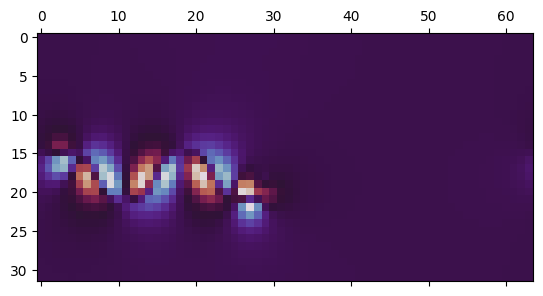

In [5]:
fig, ax = plt.subplots()
frames = [generate_frame(f) for f in plot_files]
ani = FuncAnimation(fig, update, frames=frames, repeat=False)

output_video = os.path.join(plt_directory, "animation.mp4")
ani.save(output_video, writer=FFMpegWriter(fps=10))

display(Video(output_video, embed=True))